## Code from Google Machine Learning Crash Course (not my own)

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images/ 255.0
test_images = test_images/255.0

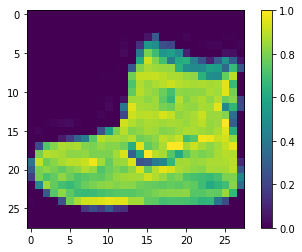

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

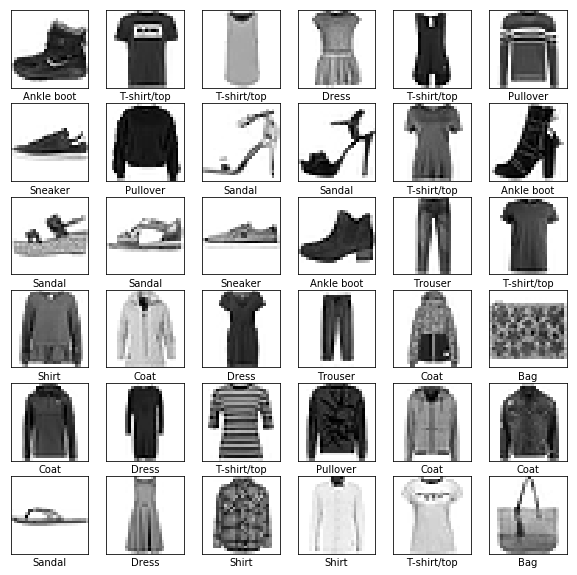

In [5]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  
    ##specifies that 28x28 pixel array should be turned into a 1D array of length 784
    keras.layers.Dense(128, activation=tf.nn.relu), 
    ##next layer with 128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax) 
    ##next and final layer which produces a list of the numbers 1-10 with corresponding confindences
])

In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Specifies the loss function (how accurate the model is)
##Specifies the optimizer function (how to update the model based on results and loss function)
##Specifies the metrics which monitors what fraction are correct

In [8]:
model.fit(train_images, train_labels, epochs=5)
##passes the data into the model and trains the model for 5 epochs

Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.5014 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3766 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3401 - acc: 0.8756: 1s - loss
Epoch 4/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3161 - acc: 0.8837
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3001 - acc: 0.8895


# TEST THE RESULTS

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/step
('Test accuracy:', 0.1989)


In [10]:
predictions = model.predict(test_images)

In [11]:
for i in range (10):
    print (np.argmax(predictions[i]), test_labels[i])


(9, 9)
(3, 2)
(3, 1)
(3, 1)
(3, 6)
(3, 1)
(3, 4)
(3, 6)
(9, 5)
(9, 7)
